In [1]:
import pandas as pd
import pmdarima as pm
from sklearn.metrics import mean_absolute_percentage_error
from prophet import Prophet
import matplotlib.pyplot as plt

In [2]:
%store -r date_list
%store -r cpi_list
%store -r ppi_list
%store -r unemployed_ratio_list
%store -r update_sp500

In [3]:
prophet_case_sp500 = pd.DataFrame()
prophet_case_sp500['ds'] = date_list
prophet_case_sp500['cpi'] = cpi_list
prophet_case_sp500['ppi'] = ppi_list
prophet_case_sp500['unemployment_ratio'] = unemployed_ratio_list
prophet_case_sp500_update = pd.concat([prophet_case_sp500, update_sp500], axis=1).dropna()
prophet_case_sp500_update['ds'] = pd.to_datetime(prophet_case_sp500_update['ds'])
prophet_case_sp500_update.rename(columns={"Price": "y"}, inplace = True)

In [4]:
train=prophet_case_sp500_update[(prophet_case_sp500_update['ds'] <= '2015-08-31')]
test=prophet_case_sp500_update[(prophet_case_sp500_update['ds'] > '2015-08-31')]
m1_without_variables = Prophet(mcmc_samples=600)
m1_without_variables.fit(train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


0.08345196188038241

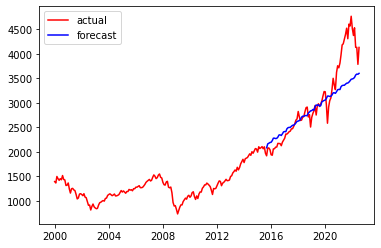

In [5]:
forecast1 = m1_without_variables.predict(test)
final_df_1 = pd.concat((forecast1['yhat'], test.reset_index()), axis=1)
plt.plot(prophet_case_sp500_update['ds'], prophet_case_sp500_update['y'], color='red', label='actual')
plt.plot(final_df_1['ds'], final_df_1['yhat'], color='blue', label='forecast')
plt.legend()
mean_absolute_percentage_error(final_df_1['y'], final_df_1['yhat'])

In [6]:
data_prophet_no_variable = final_df_1
%store data_prophet_no_variable

Stored 'data_prophet_no_variable' (DataFrame)
